In [1]:
import pandas as pd
import sys, subprocess, json
import main
import os

In [2]:
parameters = {
    "target": "target",
    "scaler": "min_max",
    "features": "",
    "feature_selector": "",
    "num_features": 5,
    "encoder": "one_hot",
    "class_balancer": "",
    "imputer": "simple_imputer",
    "evaluation_technique": 'train_test',
    "model": "logistic_regression",
    "enable_parameter_search": False,
    "splitting_runs": 10,
    "bootstrap_runs": 100,
    "plot_mean_roc": True,
    "roc_color": "",
    "parameters_grid": {"C": [2,5], "penalty": ["l1", "l2"]},
    "output_folder": "test"
}

In [3]:
model_variables = {"test": ["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8"],
                    }

In [4]:
paths = {
         'no_ucg': r"C:\Users\sv24v923\Downloads\toy_logistic_regression_dataset.csv"}

In [5]:
import pandas as pd
import numpy as np
import random

def read_and_introduce_nas(file_path, na_fraction=0.1):
    """
    Reads a CSV file and introduces random NaN values into the dataframe.

    Parameters:
        file_path (str): Path to the CSV file.
        na_fraction (float): Fraction of values to randomly replace with NaN (default: 10%).

    Returns:
        pd.DataFrame: DataFrame with NaN values introduced.
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Determine the total number of values to replace with NaN
    total_values = df.size
    na_count = int(total_values * na_fraction)

    # Generate random indices for NaN insertion
    for _ in range(na_count):
        # Randomly select a row and column to insert NaN
        row_idx = random.randint(0, df.shape[0] - 1)
        col_idx = random.randint(0, df.shape[1] - 1)

        # Set the value at the selected index to NaN
        df.iat[row_idx, col_idx] = np.nan

    return df

# Path to the CSV file
paths = {
    'no_ucg': r"C:\Users\sv24v923\Downloads\toy_logistic_regression_dataset.csv"
}

# Test the function
csv_path = paths['no_ucg']
data_with_nas = read_and_introduce_nas(csv_path, na_fraction=0.1)

data_with_nas.to_csv(r"C:\Users\sv24v923\Downloads\toy_logistic_regression_dataset_NAs.csv", index=False)

paths = {
    'no_ucg': r"C:\Users\sv24v923\Downloads\toy_logistic_regression_dataset_NAs.csv"
}

Converted dictionary: {'target': 'target', 'scaler': 'min_max', 'features': ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8'], 'feature_selector': '', 'num_features': 5, 'encoder': 'one_hot', 'class_balancer': '', 'imputer': 'simple_imputer', 'evaluation_technique': 'train_test', 'model': 'logistic_regression', 'enable_parameter_search': False, 'splitting_runs': 10, 'bootstrap_runs': 100, 'plot_mean_roc': True, 'roc_color': '', 'parameters_grid': {'C': [2, 5], 'penalty': ['l1', 'l2']}, 'output_folder': 'test'}
Fitting 15 folds for each of 4 candidates, totalling 60 fits


C:\Users\sv24v923\PycharmProjects\ML_Predicting_framework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sv24v923\PycharmProjects\ML_Predicting_framework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sv24v923\PycharmProjects\ML_Predicting_framework\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  

Finished run for test no_ucg :)


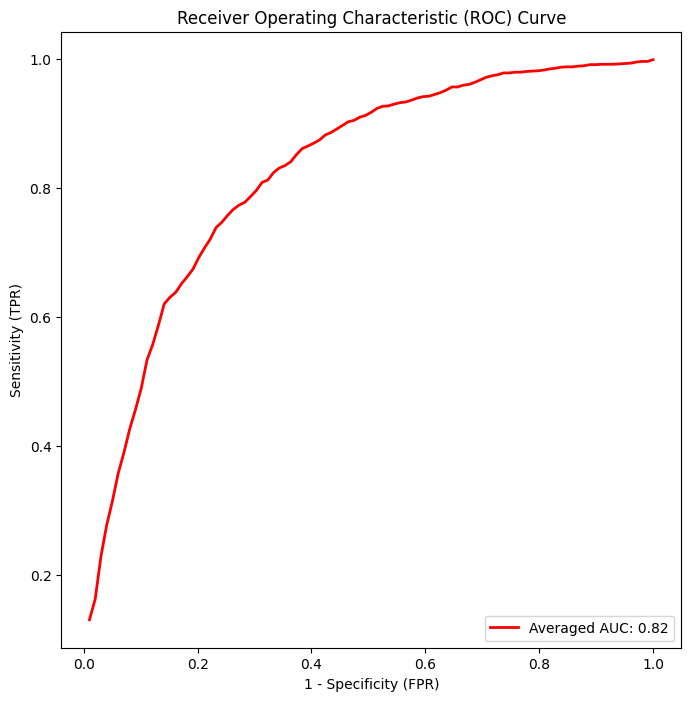

In [6]:
parameters_path = r"C:\Users\sv24v923\PycharmProjects\ML_Predicting_framework\parameters"

for k,v in paths.items():
    for model, variables in model_variables.items():
        parameters['features'] = variables

        with open(parameters_path, 'w') as json_file:
            json.dump(parameters, json_file, indent=2)

        sys.argv = [v, parameters_path]
        main.main()

        print(f"Finished run for {model} {k} :)")

In [1]:
from PyInstaller.utils.hooks import collect_data_files
import pprint

xgboost_datas = collect_data_files('xgboost')
pprint.pprint(xgboost_datas)

[('C:\\Users\\sv24v923\\PycharmProjects\\ML_Predicting_framework\\.venv\\Lib\\site-packages\\xgboost\\VERSION',
  'xgboost'),
 ('C:\\Users\\sv24v923\\PycharmProjects\\ML_Predicting_framework\\.venv\\Lib\\site-packages\\xgboost\\py.typed',
  'xgboost'),
 ('C:\\Users\\sv24v923\\PycharmProjects\\ML_Predicting_framework\\.venv\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll',
  'xgboost\\lib')]


In [3]:
import xgboost

xgboost.__version__

'2.1.3'

In [ ]:
set XGBOOST_VERSION=2.1.3

In [ ]:
main.exe "C:\Users\sv24v923\Downloads\toy_logistic_regression_dataset.csv" "C:\Users\sv24v923\PycharmProjects\ML_Predicting_framework\parameters"

In [ ]:
try:
    with open(arg2, "r") as json_file:
        parameters = json.load(json_file)
    if isinstance(parameters, dict):
        print("Converted dictionary:", parameters)
    else:
        print("The input is not a valid dictionary.")
except (ValueError, SyntaxError):
    raise ValueError("Could not convert the parameters file to a dictionary.")